# ML Supervisionado / Nao supervisionado

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("arquivos_gerados/dados_aula07.csv", index_col="Unnamed: 0")

In [7]:
df.head()

,TV,Radio,Jornal,Vendas
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### MODELO 01

In [9]:
from scipy import stats

In [19]:
## SUPERVISIONADO
#Pegar dados
x = df.TV
y = df.Vendas

#pegar as metricas
coef, intercept, r, p, std_err = stats.linregress(x, y)

# contruindo o modelo
def linha_reg(item): return coef * item + intercept

modelo01 = list(map(linha_reg, x))

In [18]:
x_test = 100
y_test = linha_reg(x_test)
print(f"Venda prevista de: {y_test}")

Venda prevista de: 11.786257592429672


### Modelo 02

In [75]:
## SUPERVISIONADO
# Pegar os dados
x = df.Jornal
y = df.Vendas

# Construir o modelo
modelo02 = np.poly1d(np.polyfit(x, y, 3))

linha = np.linspace(1, df.Jornal.max(), len(df))

reg_p = modelo02(linha)

In [73]:
x_test = modelo02(70)
print(f"Venda prevista de: {x_test}")

Venda prevista de: 17.450430150204046


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Jornal', ylabel='Vendas'>

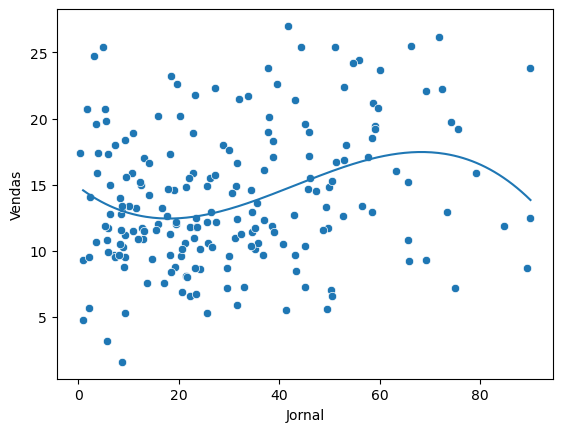

In [76]:
sns.scatterplot(x=df.Jornal, y=df.Vendas)
sns.lineplot(x=linha, y=reg_p)

In [34]:
df.head(2)

,TV,Radio,Jornal,Vendas
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [35]:
df["lucro_TV"] = modelo01

In [36]:
df.head()

,TV,Radio,Jornal,Vendas,lucro_TV
1,230.1,37.8,69.2,22.1,17.970775
2,44.5,39.3,45.1,10.4,9.147974
3,17.2,45.9,69.3,9.3,7.850224
4,151.5,41.3,58.5,18.5,14.234395
5,180.8,10.8,58.4,12.9,15.627218


In [37]:
df["lucro_Jornal"] = modelo02(linha)

In [38]:
df

,TV,Radio,Jornal,Vendas,lucro_TV,lucro_Jornal
1,230.1,37.8,69.2,22.1,17.970775,14.573390
2,44.5,39.3,45.1,10.4,9.147974,14.453131
3,17.2,45.9,69.3,9.3,7.850224,14.336846
4,151.5,41.3,58.5,18.5,14.234395,14.224494
5,180.8,10.8,58.4,12.9,15.627218,14.116032
...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,8.848493,14.468806
197,94.2,4.9,8.1,9.7,11.510545,14.317872
198,177.0,9.3,6.4,12.8,15.446579,14.162605
199,283.6,42.0,66.2,25.5,20.513985,14.002964


### Testar a previsao

In [39]:
from sklearn.metrics import r2_score

In [63]:
precisao_md01 = r2_score(df.Vendas, modelo01)
precisao_md01*100

61.187505085007096

In [77]:
precisao_md02 = r2_score(df.Vendas, modelo02(linha))
precisao_md02*100

-22.019428473444957

### Modulo 03

In [80]:
from sklearn import linear_model

In [88]:
## Nao Supervisionado

# pegar dados
x = df[["TV", "Radio", "Jornal"]]
y = df.Vendas.values

#Criando o modelo
modelo03 = linear_model.LinearRegression()

# Treinando e testando o modelo
modelo03.fit(x, y)

LinearRegression()

In [116]:
predicao_md03 = modelo03.predict([[50, 100, 10]])
predicao_md03

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.06886267])

In [97]:
df.head(2)

,TV,Radio,Jornal,Vendas,lucro_TV,lucro_Jornal
1,230.1,37.8,69.2,22.1,17.970775,14.573390
2,44.5,39.3,45.1,10.4,9.147974,14.453131


In [90]:
precisao_md03 = r2_score(df.Vendas, modelo03.predict(x))
precisao_md03*100

89.72098547736782

### Modelo 04

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [128]:
## Nao Supervisiona
# pegar dados
x = df[["TV", "Radio", "Jornal"]]
y = df.Vendas.values

# Dividir partes treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Criar modelo
modelo04 = LinearRegression()

# Treinando e testando o modelo
modelo04.fit(x_test, y_test)

LinearRegression()

In [129]:
predicao_md04 = modelo04.predict([[50, 100, 10]])
predicao_md04

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.5859831])

In [130]:
precisao_md04 = r2_score(df.Vendas, modelo04.predict(x))
precisao_md04*100

89.32869903719616

### Datasets da sklearn

In [131]:
from sklearn.datasets import load_iris

In [132]:
iris = load_iris()

In [133]:
type(iris)

sklearn.utils._bunch.Bunch

In [134]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [136]:
df.head(2)

,TV,Radio,Jornal,Vendas,lucro_TV,lucro_Jornal
1,230.1,37.8,69.2,22.1,17.970775,14.573390
2,44.5,39.3,45.1,10.4,9.147974,14.453131


In [143]:
classes = pd.qcut(df.Vendas, q=3, labels=[0,1,2])

labels = np.array(["Baixo", "Medio", "Alto"])

###  Criando meu bunch

In [145]:
from sklearn.utils import Bunch

In [148]:
b_analise = Bunch(
    data=df, 
    alvos=classes, 
    nome_alvos=labels
)

### Modelo 05

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [163]:
## Nao Supervisiona
# pegar dados
x = b_analise.data[["TV", "Radio", "Jornal"]]
y = b_analise.alvos

# Dividir partes treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Criar modelo
modelo05 = LogisticRegression()

# Treinando e testando o modelo
modelo05.fit(x_train, y_train)

LogisticRegression()

In [166]:
predicao_md05 = modelo05.predict([[50, 100, 10]])
predicao_md05

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [165]:
b_analise.nome_alvos[predicao_md05]

array(['Alto'], dtype='<U5')

In [168]:
b_analise.data.head()

,TV,Radio,Jornal,Vendas,lucro_TV,lucro_Jornal
1,230.1,37.8,69.2,22.1,17.970775,14.573390
2,44.5,39.3,45.1,10.4,9.147974,14.453131
3,17.2,45.9,69.3,9.3,7.850224,14.336846
4,151.5,41.3,58.5,18.5,14.234395,14.224494
5,180.8,10.8,58.4,12.9,15.627218,14.116032


In [200]:
valores = [
    [0, 50, 100], # Seg
    [50, 0, 100], # Ter
    [50, 30, 50], # Qua
    [50, 2, 10], # Qui
    [50, 100, 10], # Sex
]

In [203]:
previsao_semana_md05 = modelo05.predict(valores)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [204]:
previsao_semana_md05

array([0, 0, 0, 0, 2], dtype=int64)

In [205]:
b_analise.nome_alvos[previsao_semana_md05]

array(['Baixo', 'Baixo', 'Baixo', 'Baixo', 'Alto'], dtype='<U5')

In [206]:
lucros = [lucro for lucro in b_analise.nome_alvos[previsao_semana_md05]]

s_lucros = pd.Series(lucros)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

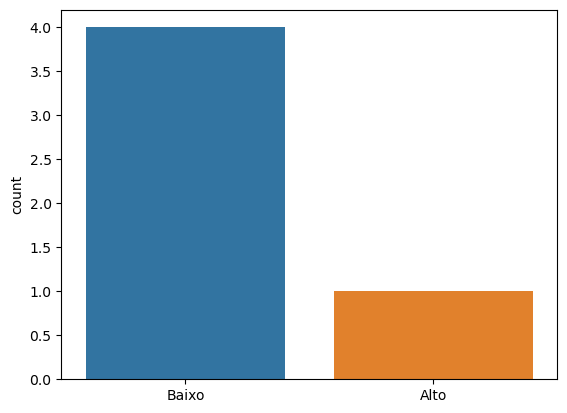

In [207]:
sns.countplot(x=s_lucros)

### Accuracia do nossos

In [208]:

from sklearn.metrics import r2_score, accuracy_score

In [211]:
precisao_treino = r2_score(df.Vendas, modelo04.predict(x))
confiancao_treino = accuracy_score(df.Vendas, modelo05.predict(x))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets